<a href="https://colab.research.google.com/github/aryan465/ml_projects/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Networks


---


Link to the dataset : https://drive.google.com/file/d/14HjM98X9T2LIw7L5Io6kq0uRc9GFN93z/view?usp=sharing

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **sklearn, seaborn, matplotlib, pandas, Tensorflow 2.x**
3. All the code should be submitted in the form of a single Jupyter notebook itself.


---

### A long time ago, in a galaxy far far away....

Rey is a warrior who wants to reach her mentor, Luke Skywalker, to complete her training. No one has seen or communicated Skywalker, who has moved to someplace in outer planetary systems for ages. But Rey is fortunate enough to find a document that can help her to reach the destination. However, she is not familiar with the document's script (which happens to be Latin). Also, it is challenging to segment characters in a handwritten script. She can use her droid BB-8 for recognising words. There are two known representations for such words known to BB-8: **Alpha representation**( using alphabets) and **Omega representation**(using shapes). Since BB-8 is an astromech droid, he can use only one of them due to memory constraints.  Rey reaches out to you for help, and you (being an expert in script recognition and convolution neural networks) agree to help her. You are supposed to carry out experiments in the following section to determine which representation could help her.

*May the force be with you!!*

---

# Task: Word Recognition

You have to train a deep CNN model that can help in recognising a word, i.e. given a word-image(image with a word present in it) as input, the model yields a representation that can help in recognising the word from a set of possible words (termed as  'lexicon' of words). 

---

## Representations of the word

There are two representations for a word:

1. **Alpha representation**: This is based on the claim that a word can be represented in terms of occurences of characters in various segments of image.

The word is split into equal parts at various levels.

At level *i*:  
* A word is split into *i* (nearly) equal segments.  
* For every segment, we compute a binary vector in which each segment correspond to alphabets/characters (Shown in fig.).

![Alpha Vector](https://drive.google.com/uc?export=view&id=17rUvYXvWUc2IP8aD-O3kualSjr2dcn2b)

*  Individual vectors of each segment are concatenated after one another, i.e. the level vector is obtained by concatenating individual vectors of first segment followed by second, third and so on.

The final vector is obtained by concatenating vectors of all levels $\{L_i.L_{i+1}.L_{i+2}\cdots\}$.


*For this assignment, you are supposed to use levels 2-5. 
This makes the length of final Alpha vector to be (2+3+4+5) * 26 = 364*



2. **Omega representation**: This is based on the claim that a word can be represented in terms of count of 11 primitve shapes present in various segments of image. The 11 shapes are: *ascender, descender, left small semi-circle, right small semi-circle, left large semi-circle, right large semi-circle, circle, vertical line, diagonal line, diagonal line at a slope of 135 degrees, and horizontal line*. These have been shown in figure.

![Primary Shapes](https://drive.google.com/uc?export=view&id=1573VBQwD03ae_UBjDaYk4fq84bGmDzr2)

The word is split into equal parts at various levels.

At level *i*:  
* A word is split into *i* (nearly) equal segments.  
* For every segment, we compute a vector in which each segment correspond to count of a shape.

![Omega for anagram](https://drive.google.com/uc?export=view&id=1nk1pj0yp5wunCxYeUp5ppH8hdsHF41rv)


*  Individual vectors of each segment are concatenated after one another, i.e. the level vector is obtained by concatenating individual vectors of first segment followed by second, third and so on.

The final vector is obtained by concatenating vectors of all levels $\{L_i.L_{i+1}.L_{i+2}\cdots\}$.

*For this assignment, you are supposed to use levels 1-5. 
This makes the length of final Omega vector to be (1+2+3+4+5) * 11 = 165*

---

**Note**: For both representations, while splitting, in case of unequal lengths of segments, segments at the end should be of more length e.g. Level 3 split of "omega" = {o,me,ga} and "play" = {p,l,ay}. Also, for a smaller words like "ok" level 3 split = {$\epsilon$,o,k} where $\epsilon$ = empty string. 

---

Your final goal of this assignment is to detemine which representation will be more helpful for word recognition. 



In [ ]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

In [ ]:
IMG_HEIGHT = 50
IMG_WIDTH = 250

# Dataset

The dataset used here is a synthetic word recognition dataset. It consists of images of lowercase English words, generated with handwritten-fonts. All images are single channel (grayscale) and have size 250 * 50. <br>

The dataset has the following directory structure:

<pre>
<b>WR-Dataset</b>
|__ <b>train</b>: [foo_1.png, bar_2.png, sample_3.png ....]
|__ <b>validation</b>: [foo_221.png, bar_322.png, sample_353.png ....]
|__ <b>test</b>: [bar_521.png, foo_272.png, example_433.png ....]
|__ <b>Alphabet.csv</b>
    
</pre>

Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Add the paths for train, validation and test directories
import zipfile

zip_file_link = zipfile.ZipFile("/content/drive/MyDrive/WR-Dataset.zip","r")
zip_file_link.extractall("/tmpB")

train_dir_path="/tmpB/WR-Dataset/Train"
validation_dir_path="/tmpB/WR-Dataset/Validation"
test_dir_path="/tmpB/WR-Dataset/Test"
alphabet_csv_path = "/tmpB/WR-Dataset/Alphabet.csv"

# Visualizing sample images

Prepare an image to label map and visualize 5 randomly chosen images from training, validation and test sets (along with their labels). Also, Mention the number of word classes present in each of the three sets.

----

**(1+1+1) points**

---

             Images    Label
0      search_1.png   search
1       pages_2.png    pages
2        like_2.png     like
3         had_7.png      had
4         who_5.png      who
...             ...      ...
2047     such_5.png     such
2048  company_0.png  company
2049     that_5.png     that
2050   online_1.png   online
2051     only_1.png     only

[2052 rows x 2 columns]
             Images     Label
0        read_0.png      read
1         and_0.png       and
2     special_4.png   special
3       years_4.png     years
4           n_1.png         n
..              ...       ...
103      that_0.png      that
104      next_7.png      next
105  products_3.png  products
106     check_1.png     check
107         e_3.png         e

[108 rows x 2 columns]
              Images      Label
0         game_4.png       game
1        first_6.png      first
2         when_7.png       when
3         high_6.png       high
4         days_7.png       days
..               ...        ...
395        end_6.pn

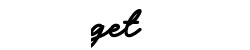

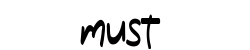

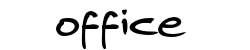

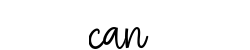

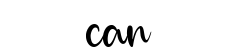

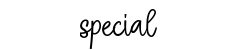

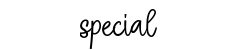

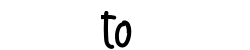

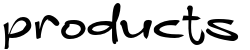

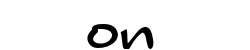

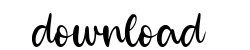

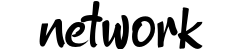

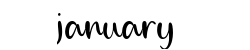

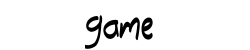

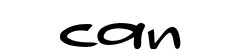

In [ ]:
# Insert code to build a dataframe with Images and their corresponding labels for 3 folders (similar to Lab 3(a))

# Function to generate dataframe
def get_dataframe(folder_name):

    for root, dirs, files in os.walk(folder_name):

        labesls = [file.split('_')[0] for file in files]
            
    df = pd.DataFrame({
        'Images': files,
        'Label': labesls
    })
   
    return df

# display the dataframes

train_df = get_dataframe(train_dir_path)
print(train_df)

validation_df = get_dataframe(validation_dir_path)
print(validation_df)

test_df = get_dataframe(test_dir_path)
print(test_df)


# Function to show images
def show_images(folder_name):

    if folder_name == train_dir_path:
        df = train_df
    elif folder_name == validation_dir_path:
        df = validation_df
    else:
        df = test_df
      
    rand_img_arr = random.choices(df['Images'], k=5)

    for img in rand_img_arr:
        var = cv2.imread(folder_name +'/'+ img)
        
        cv2_imshow(var)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


# Visualise images from the train set
show_images(train_dir_path)

# Visualise images from the validation set
show_images(validation_dir_path)

# Visualise images from the test set
show_images(test_dir_path)


Now, you will have to write modules that can give you vector representations for the input words.

---

**(3 + 3 points)**

---

In [ ]:
def get_Omega_vector(word):
  #Insert the code for a function that returns Omega representation of the input word
  alphabet_df = pd.read_csv(alphabet_csv_path,header=None)
  alphabet_df.columns = ['alphabet','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11']
  o_vector = list()
  segments = list()

  def get_vector(segment):
    temp_arr = [0 for _ in range(11)]
    alphabets = [i for i in word.lower()]

    for char in alphabets:
      new_df = alphabet_df[alphabet_df['alphabet'] == char]
      np_df = new_df.to_numpy()
      temp_arr = np.add(temp_arr, np_df[0][1:])
    return temp_arr

  for j in range(1,6):
     parts = list()
     l = len(word)
     n=0
     for k in reversed(range(1,j+1)):
       alph = l//k
       parts.append(word[n:n+alph])
       n += alph
       l = l-alph
     segments+=parts

  for segment in segments:
    temp_vector = get_vector(segment)

    for t in temp_vector:
      o_vector.append(t)

  return o_vector
  #Hint: For computing count of segments, you can add count of shapes for individual characters (already provided in Alphabet.csv file)


In [ ]:
def get_Alpha_vector(word):
  #Insert the code for a function that returns Alpha representation of the input word 
  alphabets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
  a_vector = list()
  segments = list()

  def get_vector(segment):
    temp_arr = [0 for _ in range(26)]
    chars = [i for i in word.lower()]
    
    for char in chars: 
      ind = alphabets.index(char)
      temp_arr[ind] += 1
    return(temp_arr)

  for j in range(2,6):
     parts = list()
     l = len(word)
     n=0
     for k in reversed(range(1,j+1)):
       alph = l//k
       parts.append(word[n:n+alph])
       n += alph
       l = l-alph
     segments+=parts
  for segment in segments:
    temp_vector = get_vector(segment)

    for t in temp_vector:
      a_vector.append(t)

  return a_vector


To test the above modules, try printing Omega and Alpha vectors for your first name.

In [ ]:
name ="Aryan"

print("Omega vector:",(get_Omega_vector(name)))

print("Alphavector:",(get_Alpha_vector(name)))

Omega vector: [0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 5, 1, 1, 0]
Alphavector: [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,

# Building Alpha model architecture 

Following is the architecture of the model that will learn Alpha representation:

Input shape: 250 * 50 ( RGB )


* 2 Convolution layers with 64  filters
* A Max Pool layer with pool size 2 * 2   
* 2 Convolution layers with 128  filters
* A Max Pool layer with pool size 2 * 2    
* 6 Convolution layers with 256  filters
* 3 Convolution layers with 512  filters
* GLobal Average Pooling layer
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 364 units (Output)

For all convolution layers, keep kernel size as 3 * 3, use ReLu activation 

For all max pool layers, keep stride as 2

For all dense layers, except the final layer use ReLu activation.

For final layer, use sigmoid activation.

**Loss function**: Binary cross-entropy

**Similarity Metric**: Cosine Similarity

You need to make a function that will take a learning rate as parameter as return the compiled Alpha model.

---

**(3 points)**

---

In [ ]:
#Insert the code for function that returns a model which will predict Alpharepresentation

def Alpha_model(learning_rate=1e-4):
    # Instantiate Sequential model
    model = tf.keras.models.Sequential()
    
    # Add Layers
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3),padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(364, activation='sigmoid'))
    

    
    # Define optimizers(Adam Optimizers), loss function and similarity metrics
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    cat_loss = tf.keras.losses.BinaryCrossentropy()
    acc_metrics = [tf.keras.metrics.CosineSimilarity()]
    
    
    # Compile the model
    model.compile(optimizer=opt, loss=cat_loss, metrics=acc_metrics)
    
    
    # return model
    return model
    

Following is the architecture of the Omega model, i.e. model that will learn to predict Omega representation:

Input shape: 250 * 50 ( RGB )


* 2 Convolution layers with 64  filters
* A Max Pool layer with pool size 2 * 2   
* 2 Convolution layers with 128  filters
* A Max Pool layer with pool size 2 * 2    
* 6 Convolution layers with 256  filters
* 3 Convolution layers with 512  filters
* GLobal Average Pooling layer
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 165 units (Output)

For all convolution layers, keep kernel size as 3 * 3, use ReLu activation 

For all max pool layers, keep stride as 2

For all dense layers, use ReLu activation.

**Loss function**: Mean-squared error

**Similarity Metric**: Cosine Similarity

You need to make a function that will take a learning rate as parameter as return the compiled Omega model.

---

**(3 points)**

---

In [ ]:
#Insert the code for function that returns a model which will predict Omega representation

def Omega_model(learning_rate=1e-4):
    # Instantiate Sequential model
    model = tf.keras.models.Sequential()
    
    # Add Layers
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(165, activation='relu'))
    

    # Define optimizers (Adam Optimizer), loss function and similarity metrics
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    cat_loss = tf.keras.losses.MeanSquaredError()
    acc_metrics = [tf.keras.metrics.CosineSimilarity()]
    
    
    # Compile the model
    model.compile(optimizer=opt, loss=cat_loss, metrics=acc_metrics)
    
    
    # return model
    return model
    

Why did we use BCE as loss function and sigmoid as activation for final layer in Alpha model, while MSE and ReLu for Omega model? 

----

**2 points**

---
- MSE is best used for regression tasks where as BCE is used for classification tasks.

- Sigmoid function best predicts the probability as the output where as the relu fuction makes training process faster. It also increases the non-linearity in the images.



## Seen and Unseen Words

Words whose images hase been seen by the model during training are termed as seen words, while those which are part of the test set but not seen during training are called unseen words.

----

**1 point**

---

In [ ]:
#Insert code to print seen word classes 
seen_classes = train_df['Label'].unique()
print("Train Classes:")
print(train_classes)


#Insert code to print unseen word classes from test set
test_classes = test_df['Label'].unique()
unseen_classes = list()
print("\nUnseen Word Classes from Test set:")
for cls in test_classes:
  if cls not in train_classes:
      unseen_classes.append(cls)
print(unseen_classes)

Train Classes:
['search' 'pages' 'like' 'had' 'who' 'copyright' 'before' 'products' 'do'
 'sports' 'security' 'community' 'that' 'number' 'high' 'privacy' 'about'
 'add' 'should' 'our' 'family' 'last' 'or' 'based' 'when' 'web' 'service'
 'p' 'index' 'two' 'real' 'prices' 'may' 'set' 'we' 'with' 'special'
 'mail' 'development' 'general' 'ebay' 'want' 'way' 'out' 'know' 'then'
 'us' 'south' 'life' 'does' 'city' 'also' 'order' 'site' 'part' 'all'
 'phone' 'so' 'view' 'would' 'posted' 'how' 'info' 'day' 'own' 'i' 'top'
 'technology' 'is' 'date' 'be' 'report' 'links' 'name' 'code' 'travel'
 'over' 'where' 'if' 'off' 'uk' 'company' 'said' 'section' 'map' 'items'
 'games' 'de' 'take' 'he' 'type' 'both' 'any' 'get' 'show' 'm' 'you'
 'management' 'g' 'a' 'can' 'user' 'your' 'first' 'through' 'used'
 'version' 'check' 'has' 'free' 'pm' 'please' 'under' 'been' 'even' 'same'
 'software' 'into' 'education' 'project' 'b' 'book' 'an' 'services' 'very'
 'results' 'january' 'public' 'best' 'to' 'more' 

In [ ]:
NUM_EPOCHS=30
BATCH_SIZE=8

# Tuning Hyperparameters for Omega Model
We will now tune the *learning rate* for the first model. 
For that, load the train and validation data (images and their labels, i.e. Omega vectors) 

----

**1 point**

---

In [ ]:
#Insert the code for loading train and validation set images and their corresponding labels 
def omega_generator_func(folder_path):
  for root, dirs, files in os.walk(folder_path):
    x_list = list()
    y_list = list()
    for file in files:
      img_var = cv2.imread(folder_path+'/'+file)
      # img = cv2.cvtColor(img_var, cv2.COLOR_BGR2GRAY)

      x_list.append(img_var)

      word = file.split('_')[0]
      omega_vector = get_Omega_vector(word)
      y_list.append(omega_vector)


  return (x_list,y_list)

x_train, y_train = omega_generator_func(train_dir_path)

x_train=np.asarray(x_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

x_valid, y_valid = omega_generator_func(validation_dir_path)

x_valid=np.asarray(x_valid).astype(np.int)
y_valid=np.asarray(y_valid).astype(np.int)

Now find the best LR for the Omega model.

----

**4 points**

---

In [ ]:
def determine_Omega_lr():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_similarity = []
    

    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model = Omega_model(learning_rate=l_rate)
        
        # Insert your code here to train the model using the training set and validate using the validation set
        trained_model = model.fit(x_train,y_train, epochs=NUM_EPOCHS,validation_data=(x_valid,y_valid),batch_size=BATCH_SIZE)
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        val_sim_arr = trained_model.history["val_cosine_similarity"]
        avg_sim = np.mean(val_sim_arr)
        avg_val_similarity.append(avg_sim)

    # Insert your code here to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    m_sim = max(avg_val_similarity)
    m_ind = avg_val_similarity.index(m_sim)
    best_lr = learning_rates[m_ind]
    return best_lr


# determine_best_learning_rate() is being called here
best_Omega_lr = determine_Omega_lr()
best_Omega_lr

Epoch 1/5
257/257 [==============================] - 41s 156ms/step - loss: 1250942.0904 - cosine_similarity: 0.5316 - val_loss: 1.0884 - val_cosine_similarity: 0.8203
Epoch 2/5
257/257 [==============================] - 40s 155ms/step - loss: 1.0371 - cosine_similarity: 0.8127 - val_loss: 0.7535 - val_cosine_similarity: 0.8409
Epoch 3/5
257/257 [==============================] - 40s 155ms/step - loss: 0.8137 - cosine_similarity: 0.8327 - val_loss: 0.6378 - val_cosine_similarity: 0.8579
Epoch 4/5
257/257 [==============================] - 40s 155ms/step - loss: 0.7128 - cosine_similarity: 0.8379 - val_loss: 0.6101 - val_cosine_similarity: 0.8582
Epoch 5/5
257/257 [==============================] - 40s 154ms/step - loss: 0.6919 - cosine_similarity: 0.8403 - val_loss: 0.5584 - val_cosine_similarity: 0.8604
Epoch 1/5
257/257 [==============================] - 42s 159ms/step - loss: 1.2613 - cosine_similarity: 0.7771 - val_loss: 0.6860 - val_cosine_similarity: 0.8621
Epoch 2/5
257/257 [===

0.0001

# Tuning Hyperparameters for Alpha Model
We will now tune the *learning rate* for the second model. 

For that, load the train and validation data (images and their labels, i.e. Alpha vectors) 

---

**1 Point**

---

In [ ]:
#Insert the code for loading train and validation set images and their corresponding labels (1 point)
def alpha_generator_func(folder_path):
  for root, dirs, files in os.walk(folder_path):
    x_list = list()
    y_list = list()
    for file in files:
      img_var = cv2.imread(folder_path+'/'+file)
      # img = cv2.cvtColor(img_var, cv2.COLOR_BGR2GRAY)

      x_list.append(img_var)

      word = file.split('_')[0]
      alpha_vector = get_Alpha_vector(word)
      y_list.append(alpha_vector)


  return (x_list,y_list)

alpha_x_train, alpha_y_train = alpha_generator_func(train_dir_path)

alpha_x_train=np.asarray(alpha_x_train).astype(np.int)
alpha_y_train=np.asarray(alpha_y_train).astype(np.int)


alpha_x_valid, alpha_y_valid = alpha_generator_func(validation_dir_path)

alpha_x_valid=np.asarray(alpha_x_valid).astype(np.int)
alpha_y_valid=np.asarray(alpha_y_valid).astype(np.int)

Now find the best LR for the Omega model.

----

**4 points**

---

In [ ]:
def determine_Alpha_lr():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_similarity = []
    

    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model = Alpha_model(learning_rate=l_rate)
        
        # Insert your code here to train the model using the training set and validate using the validation set
        trained_model = model.fit(alpha_x_train,alpha_y_train,
                                  epochs=NUM_EPOCHS,
                                  validation_data=(alpha_x_valid,alpha_y_valid),
                                  batch_size=BATCH_SIZE)
        
        # Insert your code here to find the average validation similarity for this model setting and append it to the maintained list
        val_sim_arr = trained_model.history["val_cosine_similarity"]
        avg_sim = np.mean(val_sim_arr)
        avg_val_similarity.append(avg_sim)

    # Insert your code here to figure out the learning rate which gives the highest average validation similarity. Print the value and return it.
    m_sim = max(avg_val_similarity)
    m_ind = avg_val_similarity.index(m_sim)
    best_lr = learning_rates[m_ind]
    return best_lr


# determine_best_learning_rate() is being called here
best_Alpha_lr = determine_Alpha_lr()
best_Alpha_lr

Epoch 1/5
257/257 [==============================] - 42s 157ms/step - loss: 0.5184 - cosine_similarity: 0.4465 - val_loss: 0.3840 - val_cosine_similarity: 0.4586
Epoch 2/5
257/257 [==============================] - 40s 156ms/step - loss: 0.3976 - cosine_similarity: 0.4844 - val_loss: 0.3835 - val_cosine_similarity: 0.4570
Epoch 3/5
257/257 [==============================] - 40s 156ms/step - loss: 0.3958 - cosine_similarity: 0.4711 - val_loss: 0.3825 - val_cosine_similarity: 0.4592
Epoch 4/5
257/257 [==============================] - 40s 156ms/step - loss: 0.3949 - cosine_similarity: 0.4799 - val_loss: 0.3816 - val_cosine_similarity: 0.4611
Epoch 5/5
257/257 [==============================] - 40s 156ms/step - loss: 0.3907 - cosine_similarity: 0.4733 - val_loss: 0.3830 - val_cosine_similarity: 0.4623
Epoch 1/5
257/257 [==============================] - 43s 161ms/step - loss: 0.4442 - cosine_similarity: 0.4328 - val_loss: 0.3787 - val_cosine_similarity: 0.4549
Epoch 2/5
257/257 [=========

0.0001

---

Describe the purpose and arguments of following callbacks from `tensorflow.keras.callbacks`


1. EarlyStopping() **[2 Points]**

> *It is used to stop training of the model when metrics has stopped improving. Some of its arguments are:-*
- monitor - It is quantity to be monitored.
- patience - The number of epochs with no improvement to look before stopping.

2. ReduceLROnPlateau() **[2 Points]**

> *It is used to erduce the learning rate when there is no improvement in a metric. Its arguments:-*
- monitor - It is quantity to be monitored.
- factor - The factor by which the learning rate has to be reduced.
- patience - The number of epochs with no improvement to look before stopping.
- cooldown - It is the number of epochs to wait before resuming normal operation after learning rate has reduced.
- min_lr - The lower bound on learning rate.

3. CSVLogger() **[2 Points]**

> *It is used to store epoch results into a csv file of choice. Its arguments:-*
- filename - The path(name) of file where epoch results are to be stored.
- separator - The string used to separate elements in the csv file.


4. ModelCheckPoint()  **[2 Points]**

> *It is used to save the model or model weights at some frequency. Its arguments:-*
- filepath - It is the filepath to which checkpoints are added.
- monitor - It is quantity to be monitored.
- save_freq - It takes 'epoch' or integer as argument. It the fequency after which checkpoints are made.



# Model building and training using callbacks

---
Now build and summarize the Omega model as per the best learning rate value determined earlier.

---

**1 Point**

---




Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_486 (Conv2D)          (None, 48, 248, 64)       1792      
_________________________________________________________________
conv2d_487 (Conv2D)          (None, 48, 248, 64)       36928     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 24, 124, 64)       0         
_________________________________________________________________
conv2d_488 (Conv2D)          (None, 24, 124, 128)      73856     
_________________________________________________________________
conv2d_489 (Conv2D)          (None, 24, 124, 128)      147584    
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 12, 62, 128)       0         
_________________________________________________________________
conv2d_490 (Conv2D)          (None, 12, 62, 256)     

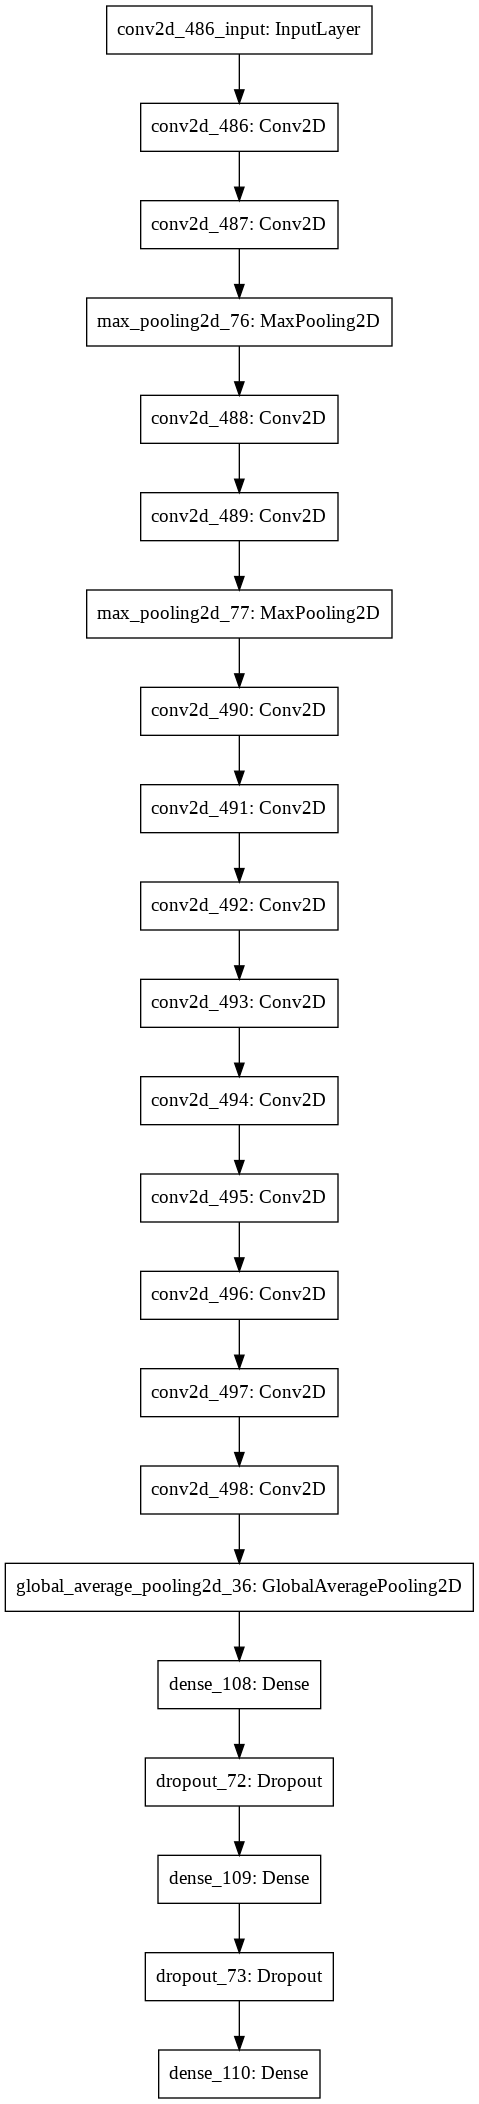

In [ ]:
# Insert code for building model using the best LR determined
omega_model = Omega_model(learning_rate=best_Omega_lr)

print(omega_model.summary())

tf.keras.utils.plot_model(omega_model)

Now instantiate the four callbacks which you have described above.


---

**2 Points**

---

In [ ]:
# EarlyStopping after validation loss has not improved for 5 epochs 
o_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# ReduceLROnPlateau reducing LR by half when validation loss has not improved for 3 epochs. 
o_reduce_lrp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3)

# CSVlogger for keeping logs in filename of your choice
o_csvl = tf.keras.callbacks.CSVLogger("omega_data.csv", separator=',')

# ModelCheckpoint that saves the best weights of model after every 10 epochs
o_model_checkpoint = tf.keras.callbacks.ModelCheckpoint("omega_checkpoint",save_freq=10)

# Make a list of all the callbacks
omega_callbacks = [o_es,o_reduce_lrp,o_csvl,o_model_checkpoint]


Now train the model using these callbacks for the loaded training word images.

---

**7 Points**

---

Epoch 1/2
257/257 [==============================] - 194s 751ms/step - loss: 1.1053 - cosine_similarity: 0.7862 - val_loss: 0.5931 - val_cosine_similarity: 0.8636
Epoch 2/2
257/257 [==============================] - 225s 877ms/step - loss: 0.7400 - cosine_similarity: 0.8417 - val_loss: 0.5459 - val_cosine_similarity: 0.8647


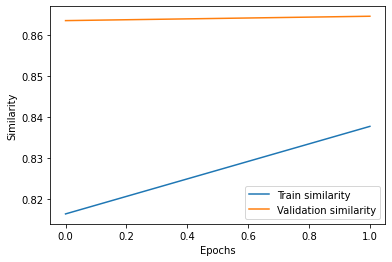

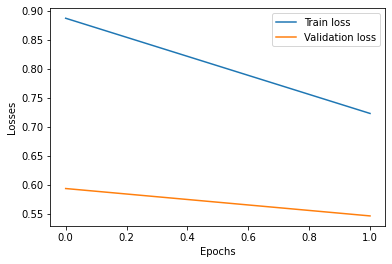

In [ ]:
# Insert code to train with callbacks (2 points)
trained_omega_model = omega_model.fit(x_train,y_train,
                                      epochs=2,
                                      validation_data=(x_valid,y_valid),
                                      batch_size=BATCH_SIZE,
                                      callbacks=omega_callbacks)


# Insert your code here to obtain the lists: epochs, training similarity, validation similarity, training loss, validation loss from CSV log file (1 point)
omega_df=pd.read_csv("omega_data.csv")
omega_epoch = omega_df['epoch'].tolist()
omega_sim = omega_df['cosine_similarity'].tolist()
omega_val_sim = omega_df['val_cosine_similarity'].tolist()
omega_loss = omega_df['loss'].tolist()
omega_val_loss = omega_df['val_loss'].tolist()




# Insert your code here to plot Epochs Vs. training and validation accuracy (2 points)
plt.plot(omega_epoch,omega_sim,label='Train similarity')
plt.plot(omega_epoch,omega_val_sim,label="Validation similarity")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Similarity")
plt.show()

# Insert your code here to plot Epochs Vs. training and validation loss (2 points)
plt.plot(omega_epoch,omega_loss,label='Train loss')
plt.plot(omega_epoch,omega_val_loss,label="Validation loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Losses")
plt.show()



Now build and summarize the Alpha model as per the best learning rate value determined earlier. 

---

**1 Point**

---




Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_499 (Conv2D)          (None, 50, 250, 64)       1792      
_________________________________________________________________
conv2d_500 (Conv2D)          (None, 50, 250, 64)       36928     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 25, 125, 64)       0         
_________________________________________________________________
conv2d_501 (Conv2D)          (None, 25, 125, 128)      73856     
_________________________________________________________________
conv2d_502 (Conv2D)          (None, 25, 125, 128)      147584    
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 12, 62, 128)       0         
_________________________________________________________________
conv2d_503 (Conv2D)          (None, 12, 62, 256)     

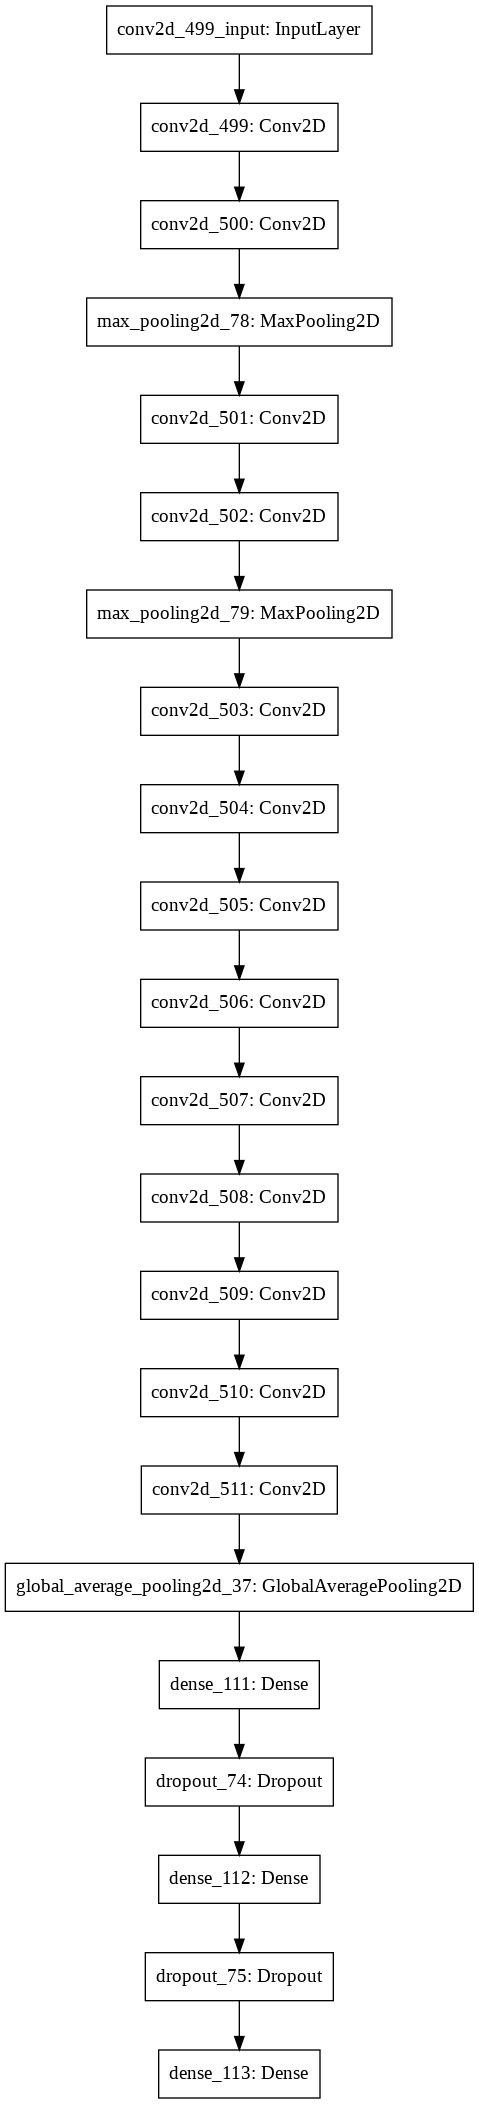

In [ ]:
# Insert code for building model using the best LR for Alpha model determined
alpha_model = Alpha_model(learning_rate=best_Alpha_lr)

print(alpha_model.summary())

tf.keras.utils.plot_model(alpha_model)

Now instantiate the four callbacks for Alpha model.

---

**2 Points**

---

In [ ]:
# EarlyStopping after validation loss has not improved for 5 epochs 
a_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# ReduceLROnPlateau reducing LR by half when validation loss has not improved for 3 epochs. 
a_reduce_lrp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3)

# CSVlogger for keeping logs in filename of your choice
a_csvl = tf.keras.callbacks.CSVLogger("alpha_data.csv", separator=',')

# ModelCheckpoint that saves the best weights of model after every 10 epochs
a_model_checkpoint = tf.keras.callbacks.ModelCheckpoint("alpha_checkpoint",save_freq=10)

# Make a list of all the callbacks
alpha_callbacks = [a_es,a_reduce_lrp,a_csvl,a_model_checkpoint]


Now train the model with training data using these callbacks.

---

**7 Points**

---

Epoch 1/2
257/257 [==============================] - 220s 853ms/step - loss: 0.4442 - cosine_similarity: 0.4350 - val_loss: 0.3700 - val_cosine_similarity: 0.4581
Epoch 2/2
257/257 [==============================] - 234s 915ms/step - loss: 0.3900 - cosine_similarity: 0.4630 - val_loss: 0.3725 - val_cosine_similarity: 0.4608


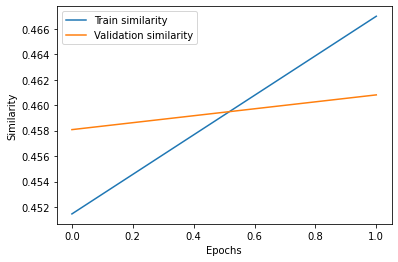

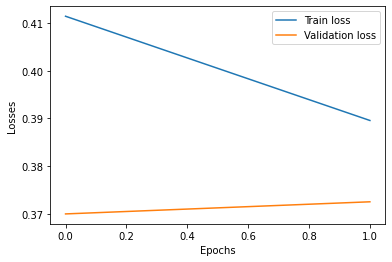

In [ ]:
# Insert code to train with callbacks (2 points)
trained_alpha_model = alpha_model.fit(alpha_x_train,alpha_y_train,
                                      epochs=2,
                                      validation_data=(alpha_x_valid,alpha_y_valid),
                                      batch_size=BATCH_SIZE,
                                      callbacks=alpha_callbacks)


# Insert your code here to obtain the lists: epochs, training similarity, validation similarity, training loss, validation loss from CSV log file (1 point)
alpha_df=pd.read_csv("alpha_data.csv")
alpha_epoch = alpha_df['epoch'].tolist()
alpha_sim = alpha_df['cosine_similarity'].tolist()
alpha_val_sim = alpha_df['val_cosine_similarity'].tolist()
alpha_loss = alpha_df['loss'].tolist()
alpha_val_loss = alpha_df['val_loss'].tolist()



# Insert your code here to plot Epochs Vs. training and validation accuracy (2 points)
plt.plot(alpha_epoch,alpha_sim,label='Train similarity')
plt.plot(alpha_epoch,alpha_val_sim,label="Validation similarity")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Similarity")
plt.show()



# Insert your code here to plot Epochs Vs. training and validation loss (2 points)
plt.plot(alpha_epoch,alpha_loss,label='Train loss')
plt.plot(alpha_epoch,alpha_val_loss,label="Validation loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Losses")
plt.show()



## Steps for Word recognition:

First, prepare a list having all the words from test set mapped to their corresponding vectors (lexicon for both Omega and Alpha representations).

---

**1 point**

---



For every image in the test set:
1. Predict the output vector representation from the trained model(s) when the image is given as input.
2. Find the word class(from lexicon) for which the similarity of its vector representation will be highest with the output vector.
3. If predicted word = true word, then it is a correct prediction, otherwise incorrect prediction.

---

Let us now perform recognition using trained Alph amodel on the test set. 

First, load the test images and their vector representations.

---

**1 point**

---

In [ ]:
# Insert code to load test images and its vector labels (1 points)


alpha_x_test, alpha_y_test = alpha_generator_func(test_dir_path)

alpha_x_test=np.asarray(alpha_x_test).astype(np.int)
alpha_y_test=np.asarray(alpha_y_test).astype(np.int)




Now load the saved trained Alpha model from the file and predict the labels

---

**1+3 points**

---

In [ ]:
# Insert code for loading the saved model from file 

alph_model=tf.keras.models.load_model("alpha_checkpoint")

In [ ]:
# Insert code for predicting word labels of the test set images 
alph_result = alph_model.evaluate(alpha_x_test,alpha_y_test)
alph_result


13/13 [==============================] - 2s 108ms/step - loss: 0.3915 - cosine_similarity: 0.5030


[0.3915058970451355, 0.5030088424682617]

Let us evaluate the performance of the model. The effective accuracy of model is defined as harmonic mean(HM) of accuracy with seen class images and accuracy with unseen class images.

---

**2 Points**

---

In [ ]:
# Insert code to load test images and its vector labels
omega_x_test, omega_y_test = omega_generator_func(test_dir_path)

omega_x_test=np.asarray(omega_x_test).astype(np.int)
omega_y_test=np.asarray(omega_y_test).astype(np.int)



Now load the saved trained Omega model from the file and predict the labels

---

**1+3 Points**

---

In [ ]:
# Insert code for loading the saved model from file
omeg_model=tf.keras.models.load_model("omega_checkpoint")


In [ ]:
# Insert code for predicting word labels of the test set images
omeg_result = omeg_model.evaluate(omega_x_test,omega_y_test)
omeg_result


13/13 [==============================] - 2s 106ms/step - loss: 0.6298 - cosine_similarity: 0.8660


[0.6298407316207886, 0.865994930267334]

# Results
Based on your experimental outcome and your observations, which representation is better, according to you? 

---

**2 Points**

---
Based on experimental results, Omega representaion comes out to be better representation used to train the model. We are getting better similarity in the case of omega representation.

We have used only words from the test set to find the matching word. How could results be affected if the lexicon had both: train and test words?

---

**2 Points**

---
Since, there are many more images in train set than in test set, if we use both train and test sets to finally evaluate the model, we would get higher accuracies because there are images which had been used to train the model and the model is recognises them closely.